Домашнее задание 
===

Данные
----
Данные содержат информацию о продажах автомобилей в месяц. 

Задание
--
* Построить модель предсказаний, используя библиотеку Propeht. 
* Сделать предсказание на год вперед (12 месяцев)
* При постоении модели использовать кросс-валидацию

In [8]:
#!pip install fbprophet
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
import itertools
import matplotlib.dates as mdates

/Users/rom25/miniforge3/envs/myenv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [91]:

#dataset
import pandas as pd
df = pd.read_csv('../datatest/monthly-car-sales.csv')
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


<AxesSubplot:>

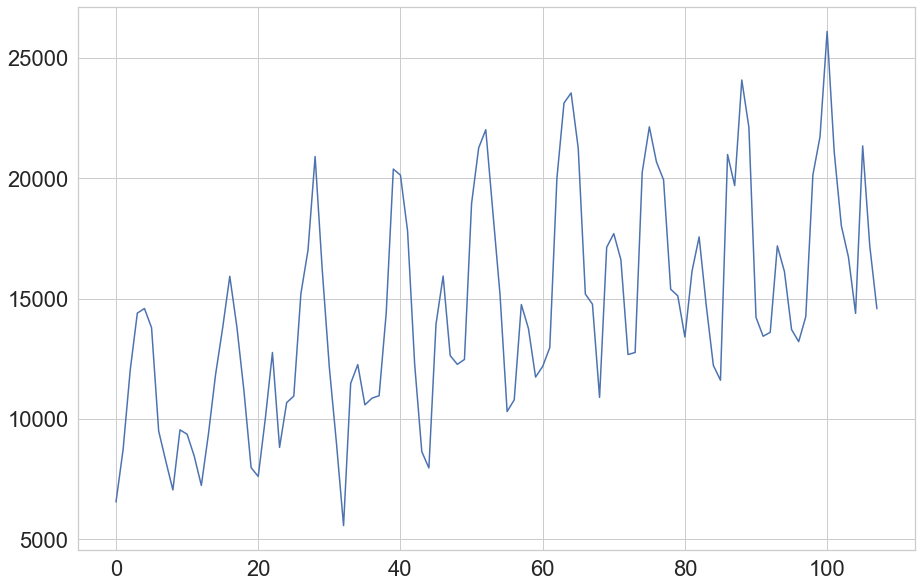

In [92]:
df['Sales'].plot()

In [93]:
df['Month'] = pd.to_datetime(df['Month'])
df.rename({'Month':'ds', 'Sales':'y'}, axis=1, inplace=True)

In [94]:
cutoffs = pd.date_range(start='1965-01-01', end='1968-01-01', freq='12MS')

In [175]:
m = Prophet(yearly_seasonality=12, 
            weekly_seasonality=False
           )
m.fit(df)
df_cv = cross_validation(model=m, horizon='365 days', cutoffs=cutoffs)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.39613
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        271.75   0.000322229       70.6732           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       272.487   4.88931e-06       81.5394      0.1846      0.1846      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     284       272.498   7.70607e-09       70.5024      0.2234      0.2234      369   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


  0%|                                                     | 0/4 [00:00<?, ?it/s]


Initial log joint probability = -84.5296
Iteration  1. Log joint probability =    43.6075. Improved by 128.137.
Iteration  2. Log joint probability =    91.2968. Improved by 47.6893.
Iteration  3. Log joint probability =    126.179. Improved by 34.8817.
Iteration  4. Log joint probability =    156.947. Improved by 30.7689.
Iteration  5. Log joint probability =    165.275. Improved by 8.32705.
Iteration  6. Log joint probability =    165.448. Improved by 0.173156.
Iteration  7. Log joint probability =    165.453. Improved by 0.00551684.
Iteration  8. Log joint probability =    165.533. Improved by 0.080105.
Iteration  9. Log joint probability =    165.846. Improved by 0.312459.
Iteration 10. Log joint probability =    165.855. Improved by 0.00934762.
Iteration 11. Log joint probability =    165.867. Improved by 0.0115359.
Iteration 12. Log joint probability =    165.912. Improved by 0.045808.
Iteration 13. Log joint probability =    165.938. Improved by 0.0253385.
Iteration 14. Log joi

 25%|███████████▎                                 | 1/4 [00:00<00:02,  1.20it/s]


Initial log joint probability = -95.9183
Iteration  1. Log joint probability =    58.1358. Improved by 154.054.
Iteration  2. Log joint probability =    101.953. Improved by 43.8176.
Iteration  3. Log joint probability =    144.933. Improved by 42.9792.
Iteration  4. Log joint probability =    156.039. Improved by 11.1065.
Iteration  5. Log joint probability =    180.539. Improved by 24.4998.
Iteration  6. Log joint probability =    181.874. Improved by 1.33511.
Iteration  7. Log joint probability =     182.09. Improved by 0.216134.
Iteration  8. Log joint probability =    182.177. Improved by 0.0864637.
Iteration  9. Log joint probability =    182.279. Improved by 0.102179.
Iteration 10. Log joint probability =    182.413. Improved by 0.134515.
Iteration 11. Log joint probability =    182.498. Improved by 0.0846584.
Iteration 12. Log joint probability =      193.1. Improved by 10.6018.
Iteration 13. Log joint probability =    193.139. Improved by 0.0388986.
Iteration 14. Log joint pr

 50%|██████████████████████▌                      | 2/4 [00:01<00:01,  1.18it/s]


Initial log joint probability = -107.677
Iteration  1. Log joint probability =     51.876. Improved by 159.553.
Iteration  2. Log joint probability =    126.095. Improved by 74.2187.
Iteration  3. Log joint probability =    183.277. Improved by 57.182.
Iteration  4. Log joint probability =    213.795. Improved by 30.518.
Iteration  5. Log joint probability =    215.917. Improved by 2.12251.
Iteration  6. Log joint probability =     216.12. Improved by 0.203197.
Iteration  7. Log joint probability =    216.124. Improved by 0.00361266.
Iteration  8. Log joint probability =    216.126. Improved by 0.00227066.
Iteration  9. Log joint probability =    216.128. Improved by 0.00113343.
Iteration 10. Log joint probability =    216.183. Improved by 0.0553567.
Iteration 11. Log joint probability =    216.184. Improved by 0.00107626.
Iteration 12. Log joint probability =    216.202. Improved by 0.0176112.
Iteration 13. Log joint probability =    216.233. Improved by 0.0310708.
Iteration 14. Log 

 75%|█████████████████████████████████▊           | 3/4 [00:02<00:00,  1.21it/s]


Initial log joint probability = -118.86
Iteration  1. Log joint probability =    75.0543. Improved by 193.915.
Iteration  2. Log joint probability =    111.362. Improved by 36.3081.
Iteration  3. Log joint probability =    169.343. Improved by 57.9808.
Iteration  4. Log joint probability =    222.733. Improved by 53.3901.
Iteration  5. Log joint probability =    234.387. Improved by 11.6539.
Iteration  6. Log joint probability =    234.779. Improved by 0.392115.
Iteration  7. Log joint probability =    234.794. Improved by 0.0148162.
Iteration  8. Log joint probability =    234.929. Improved by 0.134687.
Iteration  9. Log joint probability =    235.003. Improved by 0.0739224.
Iteration 10. Log joint probability =    235.062. Improved by 0.0590892.
Iteration 11. Log joint probability =    235.087. Improved by 0.0250563.
Iteration 12. Log joint probability =    235.138. Improved by 0.0511183.
Iteration 13. Log joint probability =    235.314. Improved by 0.175835.
Iteration 14. Log joint

100%|█████████████████████████████████████████████| 4/4 [00:03<00:00,  1.13it/s]


In [176]:
### yearly_seasonality = 12 (final model)
df_p = performance_metrics(df_cv)
metrics_tmp = df_p.mean()[['mse', 'rmse', 'mae']]
mse, rmse, mae = np.round(metrics_tmp.astype(float),2)
print(f'MSE = {mse}, RMSE = {rmse}, MAE = {mae}')

MSE = 4185828.14, RMSE = 1954.07, MAE = 1677.51


In [135]:
### reducing changepoint_prior_scale
df_p = performance_metrics(df_cv)
metrics_tmp = df_p.mean()[['mse', 'rmse', 'mae']]
mse, rmse, mae = np.round(metrics_tmp.astype(float),2)
print(f'MSE = {mse}, RMSE = {rmse}, MAE = {mae}')

MSE = 4201476.85, RMSE = 1952.08, MAE = 1760.89


In [90]:
### simplest model
df_p = performance_metrics(df_cv)
metrics_tmp = df_p.mean()[['mse', 'rmse', 'mae']]
mse, rmse, mae = np.round(metrics_tmp.astype(float),2)
print(f'MSE = {mse}, RMSE = {rmse}, MAE = {mae}')

MSE = 4186423.01, RMSE = 1971.36, MAE = 1707.65


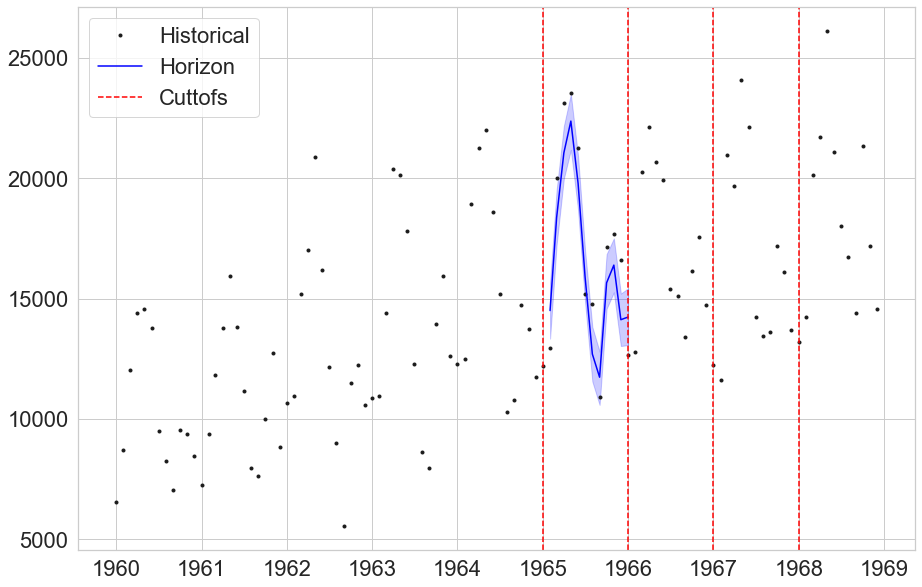

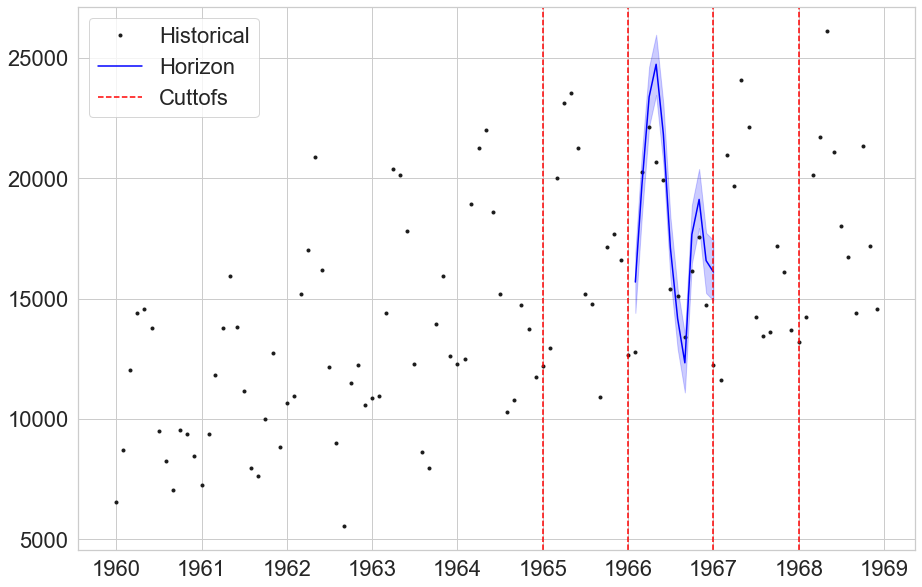

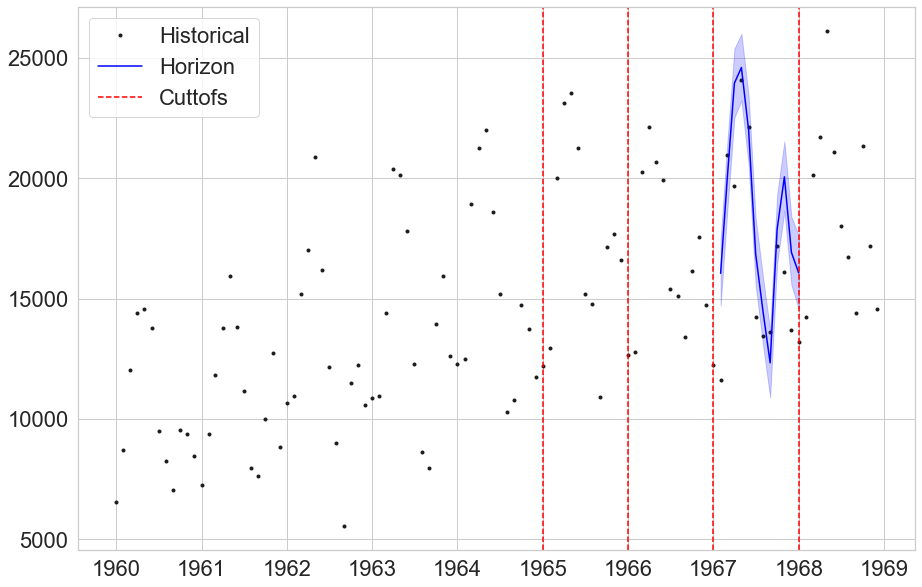

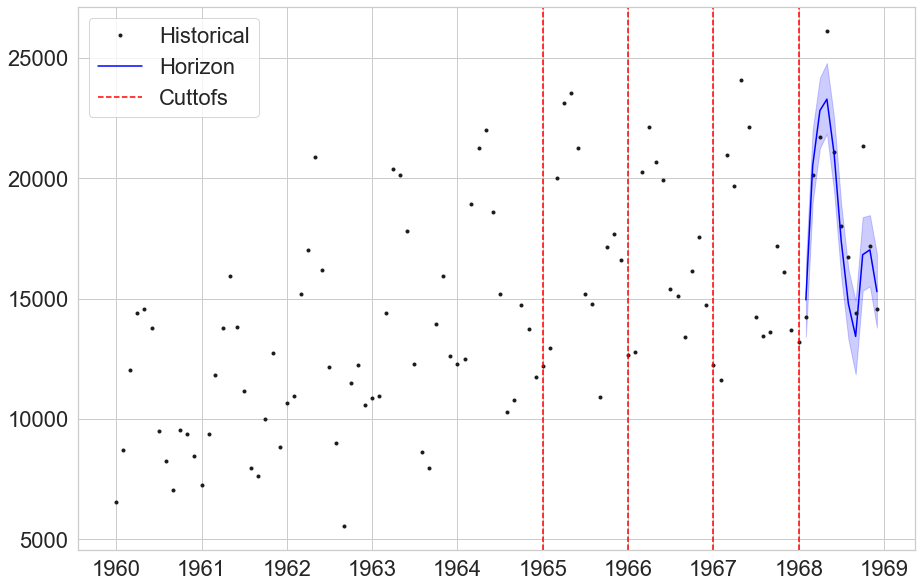

In [177]:
for ctf in df_cv['cutoff'].unique(): 
    df_tmp = df_cv[df_cv['cutoff']==ctf]


    fig, ax = plt.subplots()

    ax.plot(m.history['ds'], m.history['y'], 'k.', label = 'Historical')
    ax.plot(df_tmp['ds'], df_tmp['yhat'], ls = '-', label = 'Horizon', color='blue')
    ax.fill_between(df_tmp['ds'],
                   df_tmp['yhat_lower'],
                   df_tmp['yhat_upper'],
                   color = 'blue',
                   alpha = 0.2)
    for i in range(len(cutoffs)):
        plt_dict = {'x': cutoffs[i],
                   'c': 'red',
                    'ls':'--'
                   }
        if i == 0:
            plt_dict['label'] = 'Cuttofs'
        ax.axvline(**plt_dict)
    ax.legend()
    plt.show()

In [178]:
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

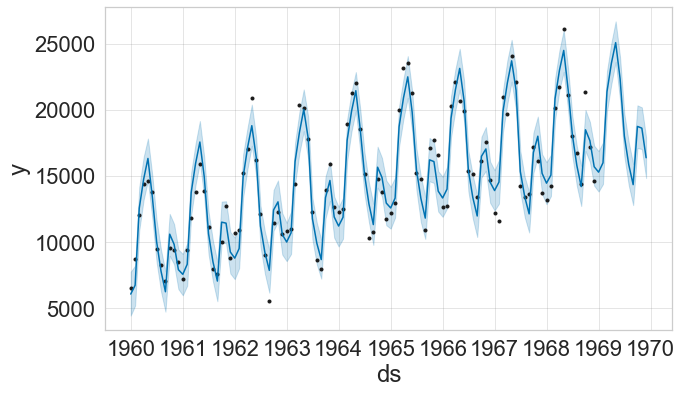

In [179]:
fig = m.plot(forecast)